In [1]:
import pandas as pd
import easygui as eg
import datetime as dt
import time
import matplotlib.pyplot as plt


In [2]:
###Import data and perform initial trims (must be .xlsx file)
file_path = eg.fileopenbox(msg="Please select an Excel file with raw kinetic OD data")
df = pd.read_excel(file_path,header=26) #Save Excel data in dataframe
cut_row = df.index.get_loc(df.index[df['Unnamed: 0'] == "Results"][0]) - 2 #Trim Results from dataframe
df = df.iloc[:cut_row,1:] #Cut dataframe to region of data
df = df.dropna(how='all',axis='columns') #Remove columns with no date

In [3]:
###Convert time to decimal hours format
for i,time in enumerate(df['Time']):
    df['Time'].iloc[i] = float(time.hour + (time.minute/60))

/home/ddooley/.local/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [4]:
###Enter blank columns
b = input("\nEnter any blank columns in a comma-separated list: ")
blanks = []
for ind in b.split(","):
    blanks.append(ind.strip())

###Remove blank columns
for col in blanks:
    df = df.drop([col], axis='columns')


Enter any blank columns in a comma-separated list: B4, C4, D4, E4


In [5]:
###Enter control columns
c = input("\nEnter any control columns in a comma-separated list: ")
controls = []
for ind in c.split(","):
    controls.append(ind.strip())


Enter any control columns in a comma-separated list: A1, A2, A3, A4


In [6]:
###Enter data series
series_bool = True
names=[]
while series_bool:
    ans = str(input("\nWould you like to add a data series? "))
    if (ans == "yes" or ans == "y" or ans == "Y" or ans == "Yes" or ans == "YES"):
        data = []
        name = input("\nEnter the name for this data series: ")
        d = input("\nEnter the column(s) containing OD data for this series (separated by commas if in replicates): ")
        for ind in d.split(","):
            data.append(ind.strip())
        if len(d) > 1:
            df[name+'_avg']=df.loc[:,data].mean(axis=1) #Average duplicates, triplicates, etc.
            names.append(name+'_avg') #Save name of series to list
        else:
            df[name+'_avg']=df[data]
    else:
        series_bool = False


Would you like to add a data series? y

Enter the name for this data series: LB

Enter the column(s) containing OD data for this series (separated by commas if in replicates): B1, B2, B3

Would you like to add a data series? y

Enter the name for this data series: YPD

Enter the column(s) containing OD data for this series (separated by commas if in replicates): C1, C2, C3

Would you like to add a data series? y

Enter the name for this data series: TSB

Enter the column(s) containing OD data for this series (separated by commas if in replicates): D1, D2, D3

Would you like to add a data series? y

Enter the name for this data series: MYD

Enter the column(s) containing OD data for this series (separated by commas if in replicates): E1, E2, E3

Would you like to add a data series? n


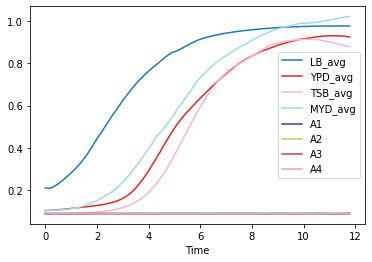

In [7]:
ax = plt.gca()

df.plot(x='Time', y=names, cmap = 'tab20', ax=ax)
df.plot(x='Time',y=controls, cmap = 'tab20b', ax=ax)
plt.show()
